In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from selectinf.Simulation.spline import cubic_spline, b_spline
from selectinf.Simulation.H1.nonlinear_H1_helpers import *
from selectinf.RealDataHelpers.rdhelpers import *
from sklearn.decomposition import PCA

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [2]:
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
data.columns = [ "CRIM",
 "ZN",#      proportion of residential land zoned for lots over 25,000 sq.ft.
 "INDUS",#   proportion of non-retail business acres per town
 "CHAS",#     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 "NOX",#      nitric oxides concentration (parts per 10 million)
 "RM",#       average number of rooms per dwelling
 "AGE",#      proportion of owner-occupied units built prior to 1940
 "DIS",#      weighted distances to five Boston employment centres
 "RAD",#      index of accessibility to radial highways
 "TAX",#      full-value property-tax rate per $10,000
 "PTRATIO",#  pupil-teacher ratio by town
 "B",#        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 "LSTAT",#    % lower status of the population
                  ]

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
data.drop(["B"], axis=1, inplace=True)

In [6]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

<Axes: xlabel='CHAS'>

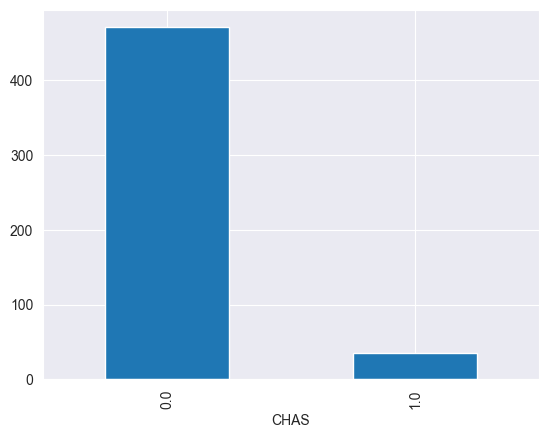

In [7]:
import matplotlib.pyplot as plt
data["CHAS"].value_counts().plot(kind='bar')

In [8]:
np.sum(data["CHAS"] == 0) / data.shape[0]

0.9308300395256917

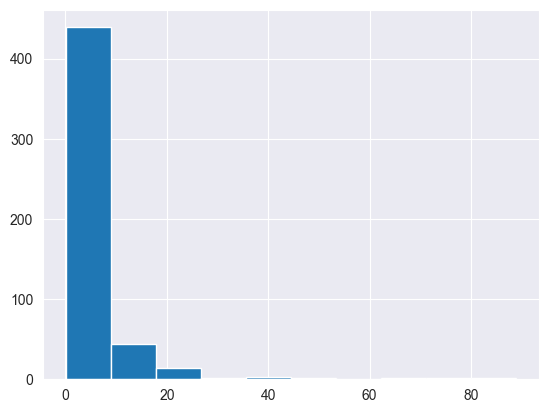

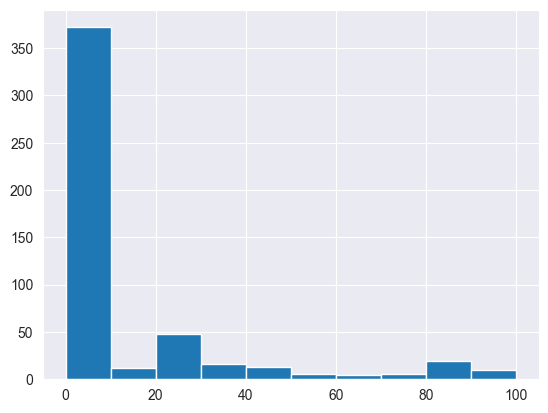

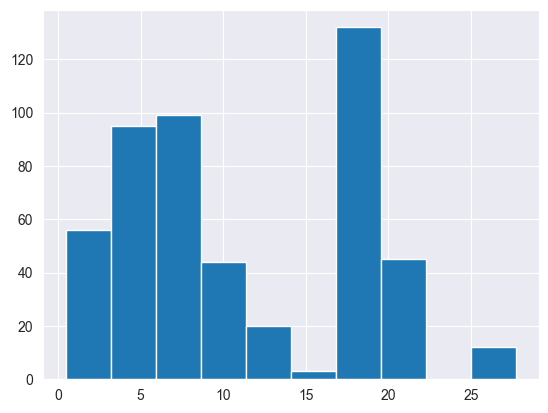

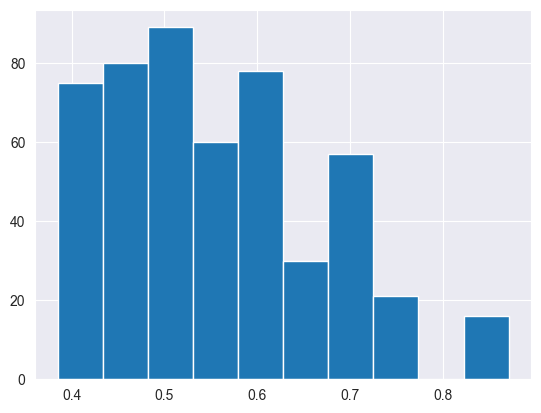

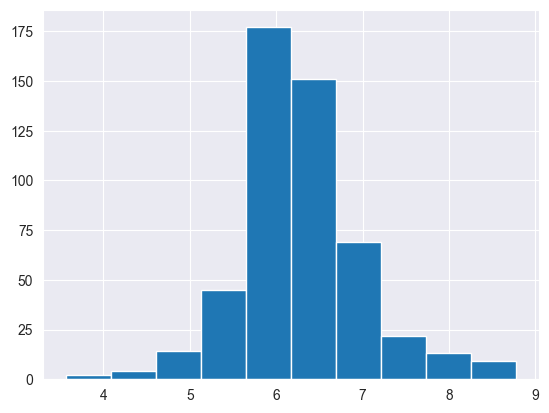

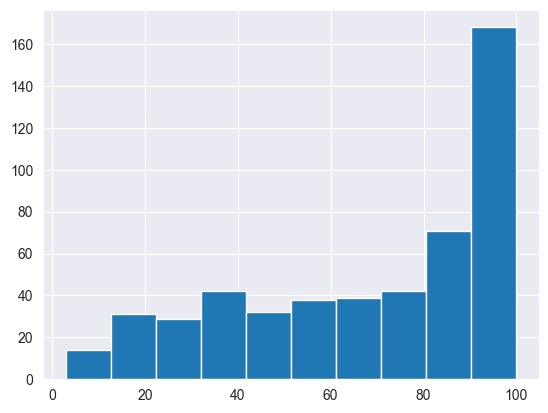

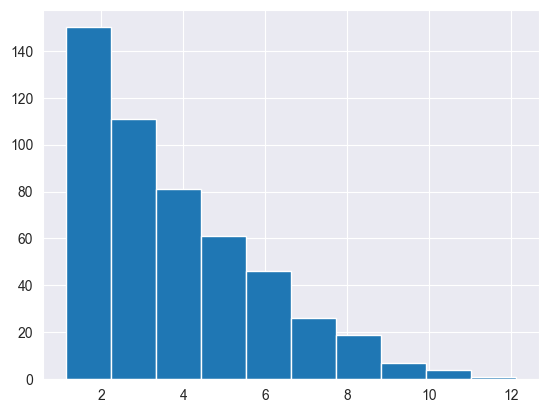

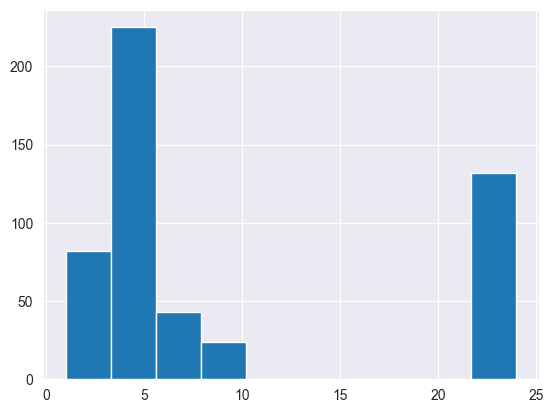

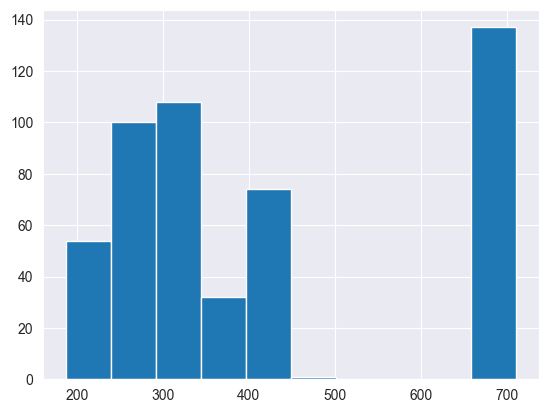

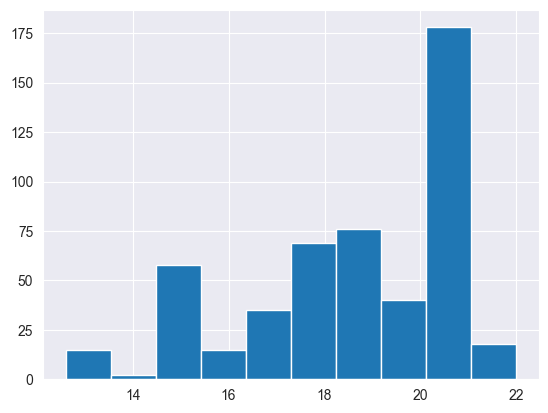

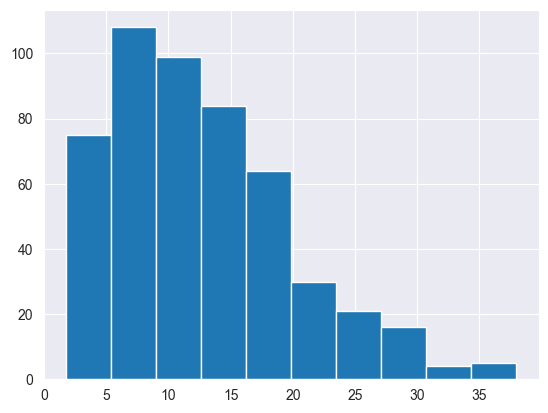

In [9]:
for var in data.columns:
 if var != "CHAS":
  plt.hist(data[var])
  plt.show()

In [66]:
# -- Stratified split by 'predictor_col' --
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    data,
    target,
    test_size=0.5,                # 25% test, 75% train
    stratify=data['CHAS'],  # key parameter for stratification
    random_state=42                # for reproducibility
)

# PCA on the training set

In [67]:
def get_splines(x_nl, x_l, nknots, degree, intercept):
    bs = b_spline(data_nl=np.array(x_nl), data_l=np.array(x_l), nknots=nknots, degree=degree,
              intercept=intercept)
    bs.construct_splines(use_quantiles=True, equally_spaced=False, center=False)
    design_train = bs.get_spline_data()
    design_train *= np.sqrt(design_train.shape[0])
    design_train[:,0] = 1
    # Returning group labels with 0 meaning the intercept (if applicable)
    groups = bs.get_groups()
    
    return design_train, groups
    

In [68]:
# Steps:
# 1. Transform training fully for naive and MLE
# 2. Transform 90% of training for data splitting's selection
# 3. Use 10% of remaining to get the transformed PCs for data splitting's inference
# 4. 

In [69]:
x_train_nl = x_train.drop(["CHAS", "RAD", "ZN"], axis=1)
x_train_l = x_train[["CHAS", "RAD", "ZN"]]
x_test_nl = x_test.drop(["CHAS", "RAD", "ZN"], axis=1)
x_test_l = x_test[["CHAS", "RAD", "ZN"]]


In [70]:
x_train.nunique()

CRIM       253
ZN          24
INDUS       60
CHAS         2
NOX         71
RM         238
AGE        198
DIS        228
RAD          9
TAX         53
PTRATIO     37
LSTAT      241
dtype: int64

In [71]:
x_train_l

,CHAS,RAD,ZN
305,0.0,7.0,33.0
251,0.0,7.0,22.0
56,0.0,2.0,85.0
427,0.0,24.0,0.0
299,0.0,5.0,70.0
...,...,...,...
477,0.0,24.0,0.0
321,0.0,5.0,0.0
473,0.0,24.0,0.0
302,0.0,7.0,34.0


In [72]:
design_train, groups_train = (
        get_splines(x_nl=x_train_nl, x_l=x_train_l, nknots=6, degree=2, intercept=True))

Equally spaced quantile knots used.


In [73]:
design_test, groups_test = (
        get_splines(x_nl=x_test_nl, x_l=x_test_l, nknots=6, degree=2, intercept=True))

Equally spaced quantile knots used.


In [74]:
design_train

array([[ 1.00000000e+00, -6.65354995e-04, -7.58173841e-01, ...,
         0.00000000e+00,  1.11341816e+02,  5.24897133e+02],
       [ 1.00000000e+00, -3.49350889e-04, -7.18686106e-01, ...,
         0.00000000e+00,  1.11341816e+02,  3.49931422e+02],
       [ 1.00000000e+00, -7.46454237e-04, -7.66687550e-01, ...,
         0.00000000e+00,  3.18119474e+01,  1.35200777e+03],
       ...,
       [ 1.00000000e+00, -3.20329792e-02,  2.99645593e-01, ...,
         0.00000000e+00,  3.81743369e+02,  0.00000000e+00],
       [ 1.00000000e+00, -5.81088030e-04, -7.48768336e-01, ...,
         0.00000000e+00,  1.11341816e+02,  5.40803106e+02],
       [ 1.00000000e+00, -4.15022221e-02,  4.16173807e-01, ...,
         1.59059737e+01,  3.81743369e+02,  0.00000000e+00]])

In [75]:
design_train.T @ design_train

array([[ 2.53000000e+02, -4.67241635e+01, -5.30698150e+01,
        -1.94176259e+02, -2.84253415e+01, -1.60756719e+02,
        -1.13519845e+02, -1.18683686e+02, -8.09510721e+01,
        -1.46281521e+02,  6.11454113e+01, -1.40924664e+02,
         1.37497197e+02, -1.78351841e+02, -1.52911312e+02,
        -1.30068711e+02, -6.12109774e+01, -1.39269046e+02,
        -1.25993171e+02,  2.86307527e+02,  3.95740626e+04,
         4.51888713e+04],
       [-4.67241635e+01,  2.53000000e+02, -7.84788901e-15,
         2.15843415e+01, -3.45517508e+01,  2.37588476e+01,
        -1.83947442e+01,  4.15132287e+01,  5.01059407e+01,
         4.07237661e+00,  3.60910736e+01,  3.17643859e+01,
        -7.11735988e+01,  8.14122041e+01, -2.67933100e+01,
         1.14481105e+00, -1.37275350e+01,  6.50910980e+01,
        -2.67695989e+01, -4.00740729e+00, -1.77936523e+04,
        -2.85536903e+01],
       [-5.30698150e+01, -7.84788901e-15,  2.53000000e+02,
         7.97503527e+01,  1.18727148e+02,  3.04011986e+01,
    

In [76]:
design_train

array([[ 1.00000000e+00, -6.65354995e-04, -7.58173841e-01, ...,
         0.00000000e+00,  1.11341816e+02,  5.24897133e+02],
       [ 1.00000000e+00, -3.49350889e-04, -7.18686106e-01, ...,
         0.00000000e+00,  1.11341816e+02,  3.49931422e+02],
       [ 1.00000000e+00, -7.46454237e-04, -7.66687550e-01, ...,
         0.00000000e+00,  3.18119474e+01,  1.35200777e+03],
       ...,
       [ 1.00000000e+00, -3.20329792e-02,  2.99645593e-01, ...,
         0.00000000e+00,  3.81743369e+02,  0.00000000e+00],
       [ 1.00000000e+00, -5.81088030e-04, -7.48768336e-01, ...,
         0.00000000e+00,  1.11341816e+02,  5.40803106e+02],
       [ 1.00000000e+00, -4.15022221e-02,  4.16173807e-01, ...,
         1.59059737e+01,  3.81743369e+02,  0.00000000e+00]])

In [77]:
const = group_lasso.gaussian
result_naive, nonzero_naive, selected_groups_naive \
    = naive_inference_real_data(X=design_train, Y=np.array(y_train), 
                                raw_data=np.array(x_train), 
                                groups=groups_train, const=const,
                                n_features=x_train.shape[1], 
                                intercept=True, weight_frac=2, level=0.9,
                                mode="weakhierarchy", root_n_scaled=False)

Selected groups: [0, 4, 9, 10, 11, 12]
Naive Selected Groups: 6
[0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.]


In [78]:
pd.DataFrame(result_naive)[pd.DataFrame(result_naive)['pval'] < 0.1]

,i,j,CI_l,CI_u,beta_hat,pval
0,0,3,0.986148,2.479245,1.732696,1.270218e-04
1,0,8,-0.008532,-0.002944,-0.005738,6.968214e-04
2,0,9,-0.000307,-0.000105,-0.000206,7.340520e-04
3,0,10,-0.010147,-0.003491,-0.006819,7.174886e-04
4,0,11,-0.010203,-0.004046,-0.007124,1.327988e-04
7,1,9,-0.000594,-0.000021,-0.000307,7.676380e-02
8,1,10,-0.033688,-0.010272,-0.021980,1.936239e-03
15,3,4,-30.774321,-5.538930,-18.156626,1.750459e-02
16,3,5,-6.210661,-2.119087,-4.164874,7.754724e-04
23,4,8,-1.524441,-0.421637,-0.973039,3.571996e-03


In [79]:
result_MLE, nonzero_MLE, selected_groups_MLE\
    = MLE_inference_real_data(X=design_train, Y=np.array(y_train), 
                              raw_data=np.array(x_train), groups=groups_train, 
                              n_features=x_train.shape[1], 
                              intercept=True, weight_frac=2, level=0.9, 
                              mode="weakhierarchy", 
                              root_n_scaled=False, proportion=0.9)

Selected groups: [0, 4, 9, 10, 11, 12]
MLE Selected Groups: 6


In [80]:
pd.DataFrame(result_MLE)[pd.DataFrame(result_MLE)['pval'] < 0.1]

,i,j,CI_l,CI_u,beta_hat,pval
0,0,3,0.856702,2.252702,1.554702,0.000249
1,0,8,-0.008649,-0.000628,-0.004639,0.057118
2,0,9,-0.000310,-0.000020,-0.000165,0.060467
3,0,10,-0.010259,-0.000703,-0.005481,0.059194
4,0,11,-0.009900,-0.001322,-0.005611,0.031400
7,1,9,-0.000639,-0.000018,-0.000329,0.082089
8,1,10,-0.027739,-0.000732,-0.014236,0.082912
16,3,5,-5.921912,-2.232485,-4.077198,0.000277
25,4,10,-1.179709,-0.159456,-0.669583,0.030850
27,5,8,-0.329337,-0.148835,-0.239086,0.000013


# Validate significant interactions on a holdout set

In [81]:
def validate(x_test, design_test, y_test, nonzero, selected_groups, 
             groups = None, n_features=None, intercept=True, mode="allpairs", level=0.9):
    X_E = design_test[:, nonzero]
    active_flag = np.zeros(np.unique(groups).shape[0])
    active_flag[selected_groups] = 1.
    raw_data=np.array(x_test)

    if intercept:
        active_vars_flag = active_flag[1:]
    else:
        active_vars_flag = active_flag

    data_interaction = {}
    task_idx = []
    for i in range(n_features):
        for j in range(i + 1, n_features):
            if mode == "allpairs":
                task_idx.append((i, j))
                data_interaction[(i, j)] = raw_data[:, i] * raw_data[:, j]
            elif mode == 'weakhierarchy':
                if active_vars_flag[i] or active_vars_flag[j]:
                    task_idx.append((i, j))
                    data_interaction[(i, j)] = raw_data[:, i] * raw_data[:, j]
            elif mode == 'stronghierarchy':
                if active_vars_flag[i] and active_vars_flag[j]:
                    task_idx.append((i, j))
                    data_interaction[(i, j)] = raw_data[:, i] * raw_data[:, j]

    result_dict = interaction_t_tests_all(X_E, y_test, n_features,
                                          active_vars_flag, data_interaction,
                                          level=level, mode=mode)

    return result_dict

In [82]:
result_naive_validate = validate(x_test, design_test, y_test, nonzero_naive, 
                                 selected_groups_naive, groups = groups_test, 
                                 n_features=x_train.shape[1],
                                 intercept=True, mode="weakhierarchy", level=0.9)

In [83]:
pd.DataFrame(result_naive_validate)

,i,j,CI_l,CI_u,beta_hat,pval
0,0,3,-0.155703,1.310037,0.577167,1.934879e-01
1,0,8,-0.009654,-0.003329,-0.006491,6.999730e-04
2,0,9,-0.000348,-0.000119,-0.000233,7.269308e-04
3,0,10,-0.011498,-0.003974,-0.007736,6.853999e-04
4,0,11,-0.012238,-0.005148,-0.008693,5.147441e-05
5,1,3,-0.256522,0.070542,-0.092990,3.477908e-01
6,1,8,-0.014128,0.007735,-0.003196,6.292661e-01
7,1,9,-0.000575,0.000017,-0.000279,1.199542e-01
8,1,10,-0.016710,-0.002913,-0.009811,1.885732e-02
9,1,11,-0.007026,0.004948,-0.001039,7.744108e-01


In [84]:
result_MLE_validate = validate(x_test, design_test, y_test, nonzero_MLE, 
                                 selected_groups_MLE, groups = groups_test, 
                                 n_features=x_train.shape[1],
                                 intercept=True, mode="weakhierarchy", level=0.9)

In [85]:
pd.DataFrame(result_MLE_validate)

,i,j,CI_l,CI_u,beta_hat,pval
0,0,3,-0.155703,1.310037,0.577167,1.934879e-01
1,0,8,-0.009654,-0.003329,-0.006491,6.999730e-04
2,0,9,-0.000348,-0.000119,-0.000233,7.269308e-04
3,0,10,-0.011498,-0.003974,-0.007736,6.853999e-04
4,0,11,-0.012238,-0.005148,-0.008693,5.147441e-05
5,1,3,-0.256522,0.070542,-0.092990,3.477908e-01
6,1,8,-0.014128,0.007735,-0.003196,6.292661e-01
7,1,9,-0.000575,0.000017,-0.000279,1.199542e-01
8,1,10,-0.016710,-0.002913,-0.009811,1.885732e-02
9,1,11,-0.007026,0.004948,-0.001039,7.744108e-01


In [86]:
naive_df = pd.DataFrame(result_naive)
naive_significant = \
    [(naive_df["i"][k], naive_df["j"][k]) for k in range(naive_df.shape[0])
     if naive_df["pval"][k] < 0.1]
naive_insig = \
    [(naive_df["i"][k], naive_df["j"][k]) for k in range(naive_df.shape[0])
     if naive_df["pval"][k] >= 0.1]

In [87]:
naive_test_df = pd.DataFrame(result_naive_validate)
naive_test_significant = \
    [(naive_test_df["i"][k], naive_test_df["j"][k]) for k in range(naive_test_df.shape[0])
     if naive_test_df["pval"][k] < 0.1]
naive_test_insig = \
    [(naive_test_df["i"][k], naive_test_df["j"][k]) for k in range(naive_test_df.shape[0])
     if naive_test_df["pval"][k] >= 0.1]

In [88]:
naive_all = [(naive_test_df["i"][k], naive_test_df["j"][k]) 
             for k in range(naive_test_df.shape[0])]

In [89]:
len(set(naive_test_significant).intersection(set(naive_significant))) / len(set(naive_significant))

0.7391304347826086

In [90]:
len(set(naive_test_insig).intersection(set(naive_insig))) / len(set(naive_test_insig))

0.7142857142857143

In [91]:
MLE_df = pd.DataFrame(result_MLE)
MLE_significant = \
    [(MLE_df["i"][k], MLE_df["j"][k]) for k in range(MLE_df.shape[0])
     if MLE_df["pval"][k] < 0.1]
MLE_insig = \
    [(MLE_df["i"][k], MLE_df["j"][k]) for k in range(MLE_df.shape[0])
     if MLE_df["pval"][k] >= 0.1]

In [92]:
MLE_test_df = pd.DataFrame(result_MLE_validate)
MLE_test_significant = \
    [(MLE_test_df["i"][k], MLE_test_df["j"][k]) for k in range(MLE_test_df.shape[0])
     if MLE_test_df["pval"][k] < 0.1]
MLE_test_insig = \
    [(MLE_test_df["i"][k], MLE_test_df["j"][k]) for k in range(MLE_test_df.shape[0])
     if MLE_test_df["pval"][k] >= 0.1]

In [93]:
MLE_all = [(MLE_test_df["i"][k], MLE_test_df["j"][k]) 
             for k in range(MLE_test_df.shape[0])]

In [94]:
alpha = 0.1
naive_train = [(naive_df["pval"][k] < alpha) for k in range(naive_df.shape[0])]
naive_test = [(naive_test_df["pval"][k] < alpha) for k in range(naive_test_df.shape[0])]

In [95]:
from sklearn.metrics import confusion_matrix
# tn, fp, 
# fn, tp
confusion_matrix(naive_test, naive_train)

array([[15,  6],
       [ 7, 17]])

In [96]:
MLE_train = [(MLE_df["pval"][k] < alpha) for k in range(MLE_df.shape[0])]
MLE_test = [(MLE_test_df["pval"][k] < alpha) for k in range(MLE_test_df.shape[0])]

In [97]:
from sklearn.metrics import confusion_matrix
# tn, fp, 
# fn, tp
confusion_matrix(MLE_test, MLE_train)

array([[16,  5],
       [11, 13]])

In [69]:
len(set(MLE_test_significant).intersection(set(MLE_significant)))# / len(MLE_test_significant)

29

In [64]:
len(set(MLE_test_insig).intersection(set(MLE_insig)))# / len(set(MLE_test_insig))

106

# Analyzing the results

In [57]:
# Average length of 90% CIs
np.mean(np.array(result_naive["CI_u"]) - np.array(result_naive["CI_l"]))

0.6536938426795408

In [58]:
#np.mean(np.array(result_ds["CI_u"]) - np.array(result_ds["CI_l"]))

In [59]:
np.mean(np.array(result_MLE["CI_u"]) - np.array(result_MLE["CI_l"]))

0.6406069460009096

In [48]:
def PCA_ds(x_train, y_train, n_comp=30, prop=0.9, seed=123):
    n, p = x_train.shape

    np.random.seed(seed)
    pi_s = prop
    subset_select = np.zeros(n, np.bool_)
    subset_select[:int(pi_s * n)] = True
    np.random.shuffle(subset_select)
    x_sel = x_train.iloc[subset_select, :]
    y_sel = y_train.iloc[subset_select]
    x_inf = x_train.iloc[~subset_select, :]
    y_inf = y_train.iloc[~subset_select]
    
    # Create PCA object
    pca = PCA(n_components=n_comp)
    # Fit PCA to the data
    pca.fit(x_sel)
    # Transform the data
    x_sel_pca = pca.transform(x_sel) / np.sqrt(pca.explained_variance_)
    x_inf_pca = pca.transform(x_inf) / np.sqrt(pca.explained_variance_)
    
    design_sel, groups_s = get_splines(x_sel_pca, nknots=6, degree=2, intercept=True)
    design_inf, groups_i = get_splines(x_inf_pca, nknots=6, degree=2, intercept=True)
    
    assert np.all(groups_i == groups_s)
    
    return ([x_sel_pca*np.sqrt(x_sel_pca.shape[0]), 
             x_inf_pca*np.sqrt(x_inf_pca.shape[0]), y_sel, y_inf], 
            [design_sel, design_inf], subset_select)